# DeepSleep 
## v1

- board
- r (run duration)
- ds (deep sleep duration)
- TX (test version)

## T

Explicación de la variante

In [10]:
board="nodemcu"
r = 10
ds = 30
TX = 3

batteries = [0.8, 2, 4, 10] #Ah

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

filename = f"../data/dslp--{board}_r{r}_ds{ds}-T{TX}.csv"
print(filename)

df = pd.read_csv(filename, parse_dates=["read_at", "timestamp"])

df.columns = ['index','read_at', 'millis', "dt", "v", "a", "w", "v_sh"]
df

../data/dslp--nodemcu_r10_ds30-T3.csv


,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-28 15:25:48.436272,518554,2025-02-28 15:25:48,5.040,0.0768,0.38707,0.00768
1,1,2025-02-28 15:25:48.446606,518564,2025-02-28 15:25:48,5.040,0.0768,0.38707,0.00768
2,2,2025-02-28 15:25:48.458477,518576,2025-02-28 15:25:48,5.040,0.0780,0.39312,0.00780
3,3,2025-02-28 15:25:48.468211,518586,2025-02-28 15:25:48,5.040,0.0780,0.39312,0.00780
4,4,2025-02-28 15:25:48.480082,518598,2025-02-28 15:25:48,5.040,0.0784,0.39514,0.00784
...,...,...,...,...,...,...,...,...
42006,42006,2025-02-28 15:33:48.394946,90705,2025-02-28 15:33:48,5.048,0.0748,0.37759,0.00748
42007,42007,2025-02-28 15:33:48.405486,90716,2025-02-28 15:33:48,5.048,0.0748,0.37759,0.00748
42008,42008,2025-02-28 15:33:48.416212,90726,2025-02-28 15:33:48,5.048,0.0780,0.39374,0.00780
42009,42009,2025-02-28 15:33:48.427527,90738,2025-02-28 15:33:48,5.048,0.0788,0.39778,0.00788


In [12]:
#remove the trailing data before reset
d = df#[df.millis.idxmin():]
d

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-28 15:25:48.436272,518554,2025-02-28 15:25:48,5.040,0.0768,0.38707,0.00768
1,1,2025-02-28 15:25:48.446606,518564,2025-02-28 15:25:48,5.040,0.0768,0.38707,0.00768
2,2,2025-02-28 15:25:48.458477,518576,2025-02-28 15:25:48,5.040,0.0780,0.39312,0.00780
3,3,2025-02-28 15:25:48.468211,518586,2025-02-28 15:25:48,5.040,0.0780,0.39312,0.00780
4,4,2025-02-28 15:25:48.480082,518598,2025-02-28 15:25:48,5.040,0.0784,0.39514,0.00784
...,...,...,...,...,...,...,...,...
42006,42006,2025-02-28 15:33:48.394946,90705,2025-02-28 15:33:48,5.048,0.0748,0.37759,0.00748
42007,42007,2025-02-28 15:33:48.405486,90716,2025-02-28 15:33:48,5.048,0.0748,0.37759,0.00748
42008,42008,2025-02-28 15:33:48.416212,90726,2025-02-28 15:33:48,5.048,0.0780,0.39374,0.00780
42009,42009,2025-02-28 15:33:48.427527,90738,2025-02-28 15:33:48,5.048,0.0788,0.39778,0.00788


Text(0.5, 1.0, 'Current')

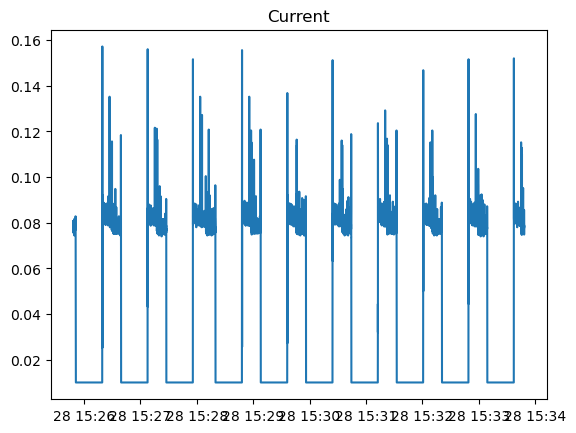

In [13]:
plt.plot(d.read_at, d.a)
plt.title("Current")

Text(0.5, 1.0, 'Voltage')

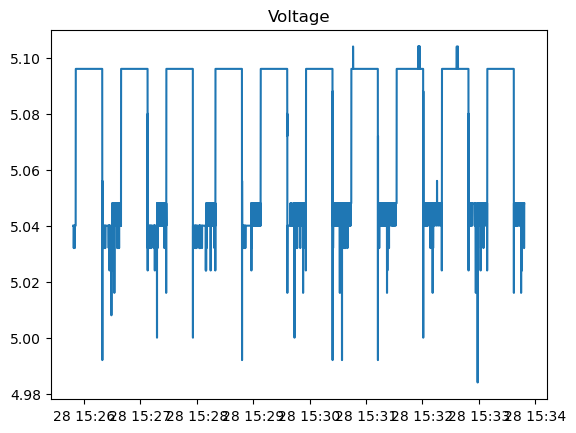

In [14]:
plt.plot(d.read_at, d.v)
plt.title("Voltage")

In [15]:
from scipy import integrate

time_data = (d.read_at - d.read_at.iloc[0]).dt.total_seconds()
current_data = d.a.to_numpy()
total_current = integrate.trapezoid(current_data, time_data)
total_current #A in timespan

np.float64(18.604389853600004)

In [16]:
time_span = max(time_data)
time_span #seg

480.0017

In [17]:
avg_current = total_current / time_span
avg_current #A

np.float64(0.038759008256845764)

## Expected runtime using batteries

In [18]:
for bat_usable_cap in batteries: #Amp hour
    runtime = bat_usable_cap / avg_current
    print(f"At {bat_usable_cap:.02f}Ah:\t{runtime:.01f} hours,\t{runtime/24:.02f} days")

At 0.80Ah:	20.6 hours,	0.86 days
At 2.00Ah:	51.6 hours,	2.15 days
At 4.00Ah:	103.2 hours,	4.30 days
At 10.00Ah:	258.0 hours,	10.75 days
